<a href="https://colab.research.google.com/github/PetrovES570/PDA_SOL/blob/main/Pratic_2_Petrov_ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 2. Парсинг HTML. BeautifulSoup

> Выполнил: Петров Евгений С. БД-231м.



**Цель практической работы:** освоение техники парсинга HTML-страниц с помощью
библиотеки BeautifulSoup в языке программирования Python для сбора, консолидации и
аналитической обработки финансовой и экономической информации.

**Общие требования к заданию.**
1. Использовать Python 3 и библиотеку BeautifulSoup4 для парсинга данных.
2. Собрать данные с одного или нескольких предложенных источников.
3. Проанализировать собранные данные и представить результаты в виде графиков или
таблиц.
4. Составить отчет, содержащий код, результаты и анализ

**Задача**: Извлечение и анализ данных о рейтинге продаж автомобилей производства США


In [1]:
#1. Установка необходимых библиотек:
!pip install requests beautifulsoup4 pandas matplotlib


In [2]:
#2. Импортирование библиотек python
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#3. Получение HTML-кода страницы.
url = 'https://greenway.icnet.ru/cars-sales-actual-usa.html'
response = requests.get(url)
page_content = response.content

In [11]:
#4. Парсинг HTML с помощью BeautifulSoup.
soup = BeautifulSoup(page_content, 'html.parser')
table = soup.find('table', {'id': 'unique_id'}) # Ищем таблицу с id='unique_id'
rows = table.find_all('tr')

In [12]:
#5. Извлечение данных и создание DataFrame.
data = []
for row in rows[1:]:  # Пропускаем заголовок
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)

# Создаем DataFrame
df = pd.DataFrame(data, columns=['Rank', 'Brand', 'Sales_2024', 'Sales_2023',
                                 'Change_percent_2024', 'Brand_2', 'Cumulative_2024',
                                 'Cumulative_2023', 'Cumulative_Change_percent'])

# Заменяем '-' на NaN, чтобы избежать ошибок при преобразовании
df.replace('-', np.nan, inplace=True)

# Преобразуем числовые значения
df['Sales_2024'] = df['Sales_2024'].str.replace(',', '.').astype(float)
df['Sales_2023'] = df['Sales_2023'].str.replace(',', '.').astype(float)
df['Change_percent_2024'] = df['Change_percent_2024'].str.replace(',', '.').astype(float)
df['Cumulative_2024'] = df['Cumulative_2024'].str.replace(',', '.').astype(float)
df['Cumulative_2023'] = df['Cumulative_2023'].str.replace(',', '.').astype(float)
df['Cumulative_Change_percent'] = df['Cumulative_Change_percent'].str.replace(',', '.').astype(float)
df


,Rank,Brand,Sales_2024,Sales_2023,Change_percent_2024,Brand_2,Cumulative_2024,Cumulative_2023,Cumulative_Change_percent
0,1,Toyota,198.0,194.0,2.4,Toyota,1567.0,1425.0,10.0
1,2,Ford,176.0,160.0,10.1,Ford,1380.0,1333.0,3.6
2,3,Chevrolet,151.0,152.0,-0.7,Chevrolet,1176.0,1190.0,-1.2
3,4,Honda,140.0,112.0,25.0,Honda,951.0,855.0,11.2
4,5,Hyundai,87.0,71.0,21.2,Nissan,636.0,624.0,1.9
5,6,Kia,75.0,72.0,4.3,Hyundai,593.0,570.0,4.1
6,7,Nissan,71.0,73.0,-1.4,Kia,525.0,537.0,-2.3
7,8,Subaru,63.0,56.0,11.8,Subaru,437.0,410.0,6.4
8,9,Tesla,53.0,58.0,-9.3,Tesla,394.0,453.0,-13.0
9,10,Mazda,41.0,30.0,36.7,Mazda,283.0,245.0,16.0


In [16]:
# Создаем данные в виде словаря
data = {
    "Brand": ["Toyota", "Ford", "Chevrolet", "Honda", "Hyundai", "Kia", "Nissan", "Subaru", "Tesla", "Mazda"],
    "Sales_2024": [198.0, 176.0, 151.0, 140.0, 87.0, 75.0, 71.0, 63.0, 53.0, 41.0],
    "Sales_2023": [194.0, 160.0, 152.0, 112.0, 71.0, 72.0, 73.0, 56.0, 58.0, 30.0],
    "Change_percent_2024": [2.4, 10.1, -0.7, 25.0, 21.2, 4.3, -1.4, 11.8, -9.3, 36.7],
    "Brand_2": ["Toyota", "Ford", "Chevrolet", "Honda", "Nissan", "Hyundai", "Kia", "Subaru", "Tesla", "Mazda"],
    "Cumulative_2024": [1567.0, 1380.0, 1176.0, 951.0, 636.0, 593.0, 525.0, 437.0, 394.0, 283.0],
    "Cumulative_2023": [1425.0, 1333.0, 1190.0, 855.0, 624.0, 570.0, 537.0, 410.0, 453.0, 245.0],
    "Cumulative_Change_percent": [10.0, 3.6, -1.2, 11.2, 1.9, 4.1, -2.3, 6.4, -13.0, 16.0]
}

# Создаем DataFrame
df = pd.DataFrame(data)

# Анализ изменений в продажах
df['Sales_Change'] = df['Sales_2024'] - df['Sales_2023']
df['Sales_Change_percent'] = (df['Sales_Change'] / df['Sales_2023']) * 100

# Сортируем по изменению продаж 2024
df_sorted_sales = df[['Brand', 'Sales_2023', 'Sales_2024', 'Sales_Change', 'Sales_Change_percent']]
df_sorted_sales = df_sorted_sales.sort_values(by='Sales_Change_percent', ascending=False)

# Сортируем по кумулятивным изменениям
df_sorted_cumulative = df[['Brand', 'Cumulative_2023', 'Cumulative_2024', 'Cumulative_Change_percent']]
df_sorted_cumulative = df_sorted_cumulative.sort_values(by='Cumulative_Change_percent', ascending=False)

# Вывод результатов
print("Анализ изменений в продажах:")
print(df_sorted_sales)
print("\nАнализ кумулятивных изменений:")
print(df_sorted_cumulative)

Анализ изменений в продажах:
       Brand  Sales_2023  Sales_2024  Sales_Change  Sales_Change_percent
9      Mazda        30.0        41.0          11.0             36.666667
3      Honda       112.0       140.0          28.0             25.000000
4    Hyundai        71.0        87.0          16.0             22.535211
7     Subaru        56.0        63.0           7.0             12.500000
1       Ford       160.0       176.0          16.0             10.000000
5        Kia        72.0        75.0           3.0              4.166667
0     Toyota       194.0       198.0           4.0              2.061856
2  Chevrolet       152.0       151.0          -1.0             -0.657895
6     Nissan        73.0        71.0          -2.0             -2.739726
8      Tesla        58.0        53.0          -5.0             -8.620690

Анализ кумулятивных изменений:
       Brand  Cumulative_2023  Cumulative_2024  Cumulative_Change_percent
9      Mazda            245.0            283.0                

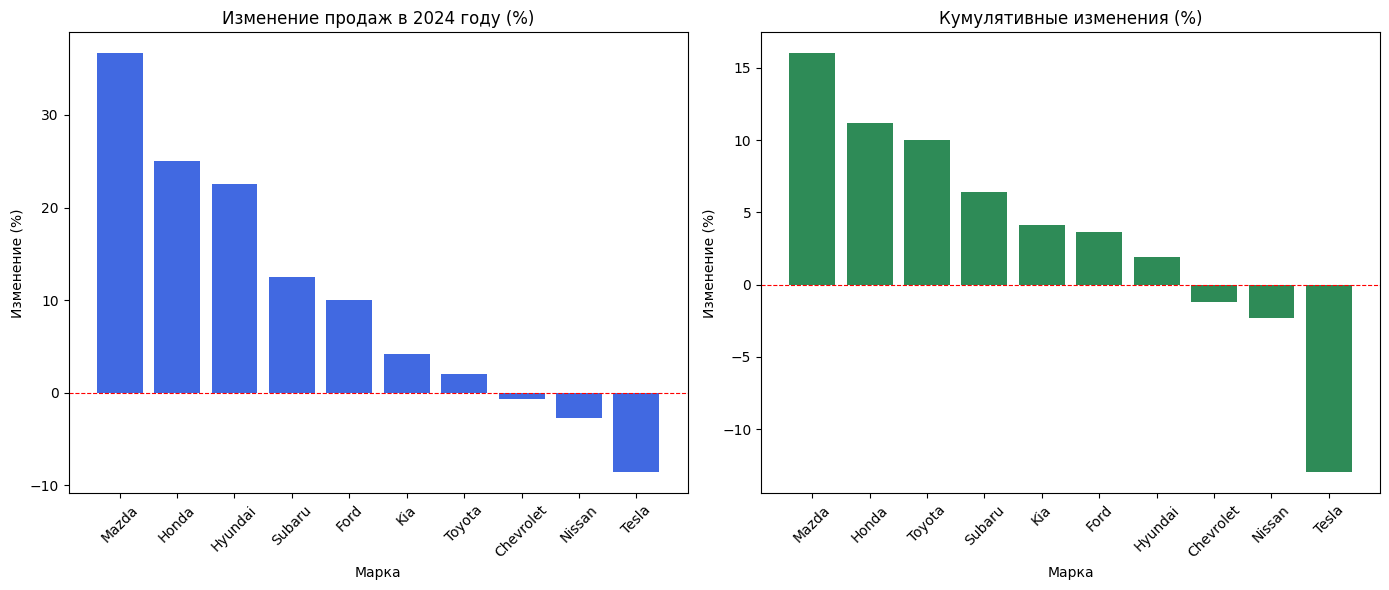

In [17]:
# Создаем данные в виде словаря
data = {
    "Brand": ["Toyota", "Ford", "Chevrolet", "Honda", "Hyundai", "Kia", "Nissan", "Subaru", "Tesla", "Mazda"],
    "Sales_2024": [198.0, 176.0, 151.0, 140.0, 87.0, 75.0, 71.0, 63.0, 53.0, 41.0],
    "Sales_2023": [194.0, 160.0, 152.0, 112.0, 71.0, 72.0, 73.0, 56.0, 58.0, 30.0],
    "Change_percent_2024": [2.4, 10.1, -0.7, 25.0, 21.2, 4.3, -1.4, 11.8, -9.3, 36.7],
    "Brand_2": ["Toyota", "Ford", "Chevrolet", "Honda", "Nissan", "Hyundai", "Kia", "Subaru", "Tesla", "Mazda"],
    "Cumulative_2024": [1567.0, 1380.0, 1176.0, 951.0, 636.0, 593.0, 525.0, 437.0, 394.0, 283.0],
    "Cumulative_2023": [1425.0, 1333.0, 1190.0, 855.0, 624.0, 570.0, 537.0, 410.0, 453.0, 245.0],
    "Cumulative_Change_percent": [10.0, 3.6, -1.2, 11.2, 1.9, 4.1, -2.3, 6.4, -13.0, 16.0]
}

# Создаем DataFrame
df = pd.DataFrame(data)

# Анализ изменений в продажах
df['Sales_Change'] = df['Sales_2024'] - df['Sales_2023']
df['Sales_Change_percent'] = (df['Sales_Change'] / df['Sales_2023']) * 100

# Сортируем по изменению продаж 2024
df_sorted_sales = df[['Brand', 'Sales_2023', 'Sales_2024', 'Sales_Change', 'Sales_Change_percent']]
df_sorted_sales = df_sorted_sales.sort_values(by='Sales_Change_percent', ascending=False)

# Сортируем по кумулятивным изменениям
df_sorted_cumulative = df[['Brand', 'Cumulative_2023', 'Cumulative_2024', 'Cumulative_Change_percent']]
df_sorted_cumulative = df_sorted_cumulative.sort_values(by='Cumulative_Change_percent', ascending=False)

# Визуализация
plt.figure(figsize=(14, 6))

# График 1: Изменения продаж 2024
plt.subplot(1, 2, 1)
plt.bar(df_sorted_sales['Brand'], df_sorted_sales['Sales_Change_percent'], color='royalblue')
plt.title('Изменение продаж в 2024 году (%)')
plt.xlabel('Марка')
plt.ylabel('Изменение (%)')
plt.xticks(rotation=45)
plt.axhline(0, color='red', linewidth=0.8, linestyle='--')

# График 2: Кумулятивные изменения
plt.subplot(1, 2, 2)
plt.bar(df_sorted_cumulative['Brand'], df_sorted_cumulative['Cumulative_Change_percent'], color='seagreen')
plt.title('Кумулятивные изменения (%)')
plt.xlabel('Марка')
plt.ylabel('Изменение (%)')
plt.xticks(rotation=45)
plt.axhline(0, color='red', linewidth=0.8, linestyle='--')

plt.tight_layout()
plt.show()

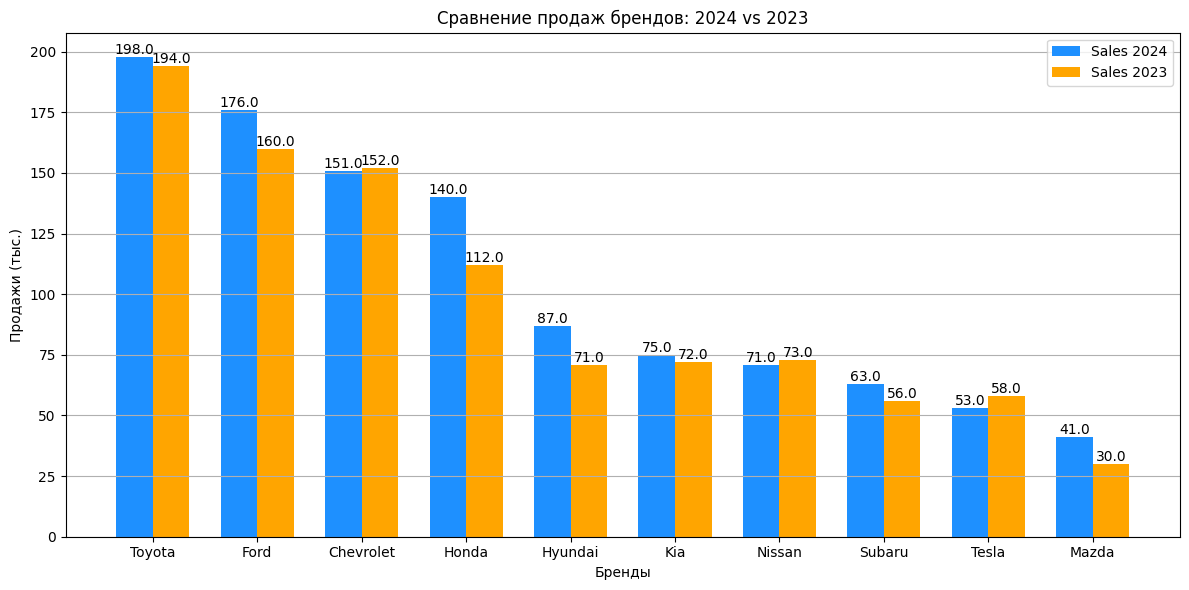

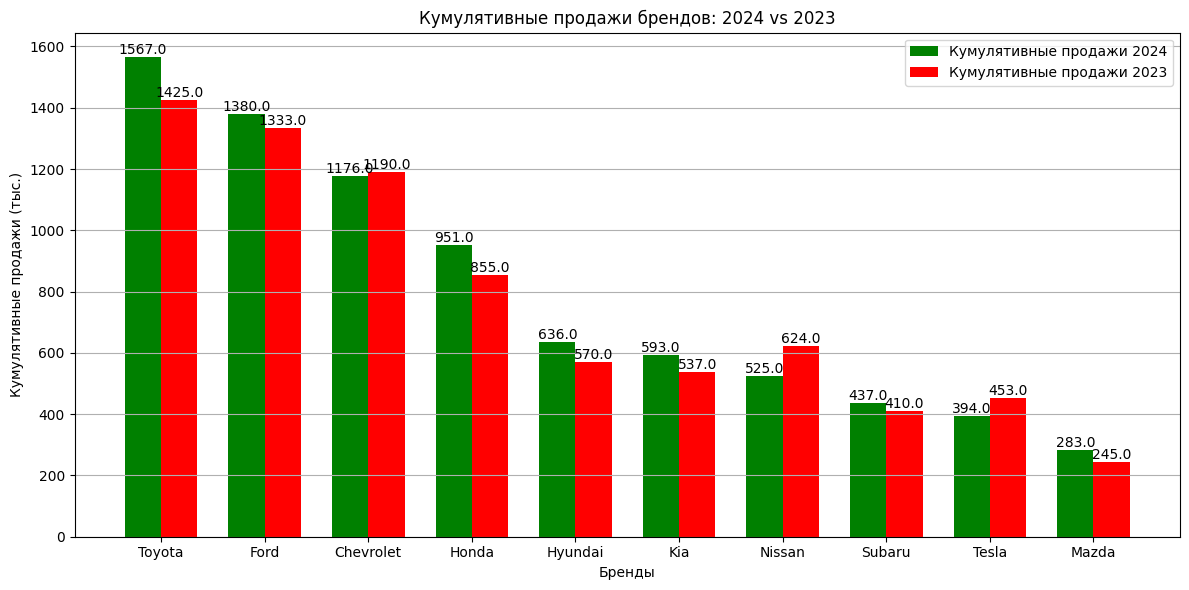

In [18]:
# Данные
brands = ['Toyota', 'Ford', 'Chevrolet', 'Honda', 'Hyundai', 'Kia', 'Nissan', 'Subaru', 'Tesla', 'Mazda']
sales_2024 = [198.0, 176.0, 151.0, 140.0, 87.0, 75.0, 71.0, 63.0, 53.0, 41.0]
sales_2023 = [194.0, 160.0, 152.0, 112.0, 71.0, 72.0, 73.0, 56.0, 58.0, 30.0]
cumulative_sales_2024 = [1567.0, 1380.0, 1176.0, 951.0, 636.0, 593.0, 525.0, 437.0, 394.0, 283.0]
cumulative_sales_2023 = [1425.0, 1333.0, 1190.0, 855.0, 570.0, 537.0, 624.0, 410.0, 453.0, 245.0]

# Настройки
x = np.arange(len(brands))
width = 0.35  # ширина столбцов

# График 1: Продажи в 2024 и 2023 годах
fig, ax1 = plt.subplots(figsize=(12, 6))
bars1 = ax1.bar(x - width/2, sales_2024, width, label='Sales 2024', color='dodgerblue')
bars2 = ax1.bar(x + width/2, sales_2023, width, label='Sales 2023', color='orange')

ax1.set_xlabel('Бренды')
ax1.set_ylabel('Продажи (тыс.)')
ax1.set_title('Сравнение продаж брендов: 2024 vs 2023')
ax1.set_xticks(x)
ax1.set_xticklabels(brands)
ax1.legend()

# Добавляем значения на столбцы
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

# График 2: Кумулятивные продажи
fig, ax2 = plt.subplots(figsize=(12, 6))
bars3 = ax2.bar(x - width/2, cumulative_sales_2024, width, label='Кумулятивные продажи 2024', color='green')
bars4 = ax2.bar(x + width/2, cumulative_sales_2023, width, label='Кумулятивные продажи 2023', color='red')

ax2.set_xlabel('Бренды')
ax2.set_ylabel('Кумулятивные продажи (тыс.)')
ax2.set_title('Кумулятивные продажи брендов: 2024 vs 2023')
ax2.set_xticks(x)
ax2.set_xticklabels(brands)
ax2.legend()

# Добавляем значения на столбцы
for bar in bars3 + bars4:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Выводы:

1. **Сравнение продаж в 2024 и 2023 годах:**
   - На графике видно, что Toyota остается лидером по продажам в 2024 году с увеличением на 2.4% по сравнению с 2023 годом.
   - Ford показывает наибольший прирост в 10.1%, что свидетельствует о повышенном интересе к их моделям.
   - Chevrolet, напротив, наблюдает небольшой спад в продажах, упав на 0.7%.
   - Mazda демонстрирует впечатляющий рост на 36.7%, что может указывать на успешные новые модели или маркетинговые стратегии.

2. **Кумулятивные продажи:**
   - Кумулятивные продажи также показывают схожие тренды, где Toyota и Ford продолжают лидировать.
   - Значительный рост кумулятивных продаж для Honda подтверждает успешное восстановление после меньших показателей в прошлом.
   - За два года Nissan и Tesla переживают падение по сравнению с 2023 годом, что может сигнализировать о необходимости пересмотра их рыночных стратегий.